In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
import seaborn as sns
import warnings# to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [2]:
df = pd.read_csv('USA_Housing.csv')

# Shape of data

In [3]:
df.shape

(5000, 7)

# View first 3 rows

In [4]:
df.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


# info of data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


# Missing data

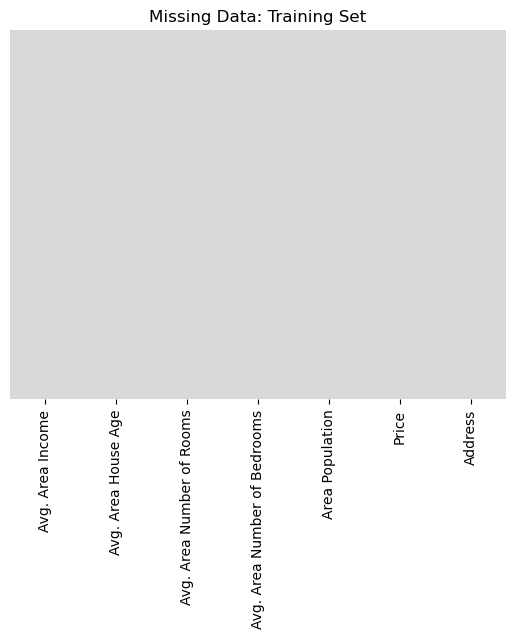

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

# Remove Address, as it is not necessary for prediction

In [7]:
df.drop("Address",inplace=True,axis=1)

# Show first 3 rows

In [8]:
df.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06


# Remove missing rows

In [9]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [10]:
# As no row is missing but we run remove na for our satisfication
df.dropna(inplace=True)

# Neumeric Features of data

In [11]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# **GETTING MODEL READY**

Now that we've explored the data, it is time to get these features 'model ready'. Categorial features will need to be converted into 'dummy variables', otherwise a machine learning algorithm will not be able to take in those features as inputs.

In [12]:
df.shape

(5000, 6)

> # Now the train data is perfect for a machine learning algorithm:  
- all the data is numeric
- everything is concatenated together

# Machine Learning

### split data

In [13]:
from sklearn.model_selection import train_test_split

## Target Variable Splitting

In [14]:
X = df.drop('Price',axis=1)
y = df['Price']

# Preporcessing

In [15]:
from sklearn import preprocessing

In [16]:
pre_process = preprocessing.StandardScaler().fit(X)
x_transform = pre_process.fit_transform(X)

##### Price is out target variable

# Split data into train and test

In [31]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x_transform,y,test_size=0.10,random_state=101)

In [32]:
Xtrain.shape

(4500, 5)

In [33]:
Xtest.shape

(500, 5)

# Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()

# Pass training data into model

In [36]:
model.fit(Xtrain,Ytrain)

LinearRegression()

# Model Testing

In [37]:
y_Predict = model.predict(Xtest)

In [38]:
y_Predict.shape

(500,)

# Combine actual value and predicted value side by side

In [39]:
result = np.column_stack((Ytest,y_Predict))

In [40]:
print("Actual Value | Predicted Value")
print("*"*30)
for actual,predicted in result:
    print(f"{actual:12.2f} | {predicted:12.2f}")

Actual Value | Predicted Value
******************************
  1251688.62 |   1257098.10
   873048.32 |    822086.76
  1696977.66 |   1739484.60
  1063964.29 |    973128.93
   948788.28 |    993918.46
   730043.65 |    645734.60
  1166925.15 |   1074412.82
   705444.12 |    856463.98
  1499988.88 |   1445048.63
  1288199.15 |   1201847.72
  1441736.76 |   1454475.52
  1279681.15 |   1296582.99
  1754969.16 |   1736858.05
  1511653.45 |   1336694.59
  1441956.20 |   1386280.01
  1119992.62 |   1223122.35
   727866.53 |    615840.79
  1138885.10 |    964515.62
  1074263.32 |   1222020.64
  1386473.37 |   1197532.32
   404643.60 |    506756.97
  1449829.49 |   1767894.37
  1775874.76 |   1854829.43
  1202050.58 |   1198521.38
  1105737.46 |   1065384.60
  1835564.69 |   1810199.63
  1795428.77 |   1767830.26
  1424283.37 |   1440162.97
  1365945.08 |   1386122.52
  1492011.50 |   1539972.95
   624432.97 |    729561.93
  1827476.20 |   1754434.69
  1575680.04 |   1465273.07
  1051519.07 |

## **Residual Analysis**
Residual analysis in linear regression is a way to check how well the model fits the data. It involves looking at the differences (residuals) between the actual data points and the predictions from the model.

In a good model, the residuals should be randomly scattered around zero on a plot. If there are patterns or a fan-like shape, it suggests the model may not be the best fit. Outliers, points far from the others, can also affect the model.

Residual analysis helps ensure the model's accuracy and whether it meets the assumptions of linear regression. If issues are found, adjustments to the model may be needed to improve its performance.

In [41]:
residual = actual- y_Predict.reshape(-1)

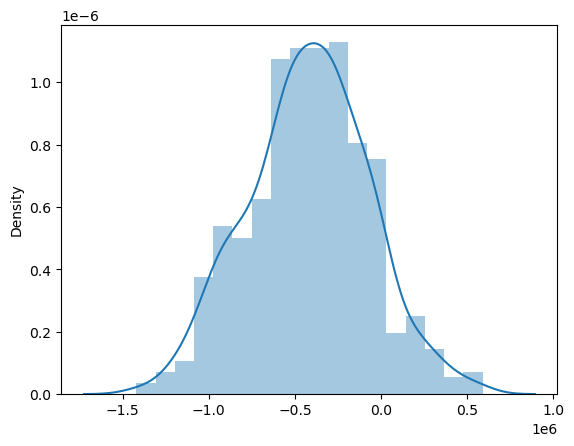

In [42]:
sns.distplot(residual,kde=True)
plt.show()

# Line Graph

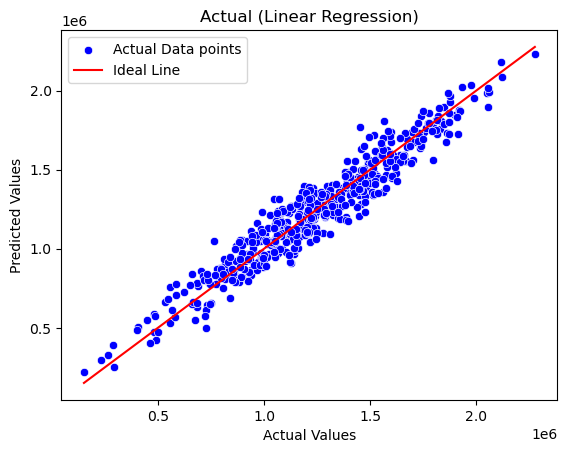

In [43]:
sns.scatterplot(x=Ytest, y=y_Predict, color='blue', label='Actual Data points')
plt.plot([min(Ytest), max(Ytest)], [min(Ytest), max(Ytest)], color='red', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual (Linear Regression)')
plt.legend()
plt.show()

# Model Evaluation

In [44]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(Ytest, y_Predict)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
Mean Squared Error: 9839952411.801706
Root Mean Squared Error: 99196.53427313732
